# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
------------------------------------------------------------------------------------------------------------------

3 Overall Observable Trends for Part 1 (WeatherPy)
----
(I have already included separate observations after each plot)

------------------------------------------------------------------------------------------------------------------
TREND 1: 
----
Although it makes sense logically, it was interesting to see graphically how strong the correlations were
when comparing Temperature and Latitude within the Northern and Southern Hemispheres.

There was a very strong NEGATIVE correlation when comparing Temp and Lat in the Northern Hempishere.. whereas..

There was a strong/moderate Positive correlation when comparing Temp and Lat in the Southern Hemisphere...

------------------------------------------------------------------------------------------------------------------
TREND 2:
----
Wind speed was interesting in the sense that regardless of what latitude the city was in, the speeds seem to mostly cluser around 5-10mph in the NORTHERN Hemisphere...There was no clear directional correation as well.

That being said, surprisingly there was a weak negative correlation between wind speed and latitude
when looking at the SOUTHERN Hemisphere...

------------------------------------------------------------------------------------------------------------------
TREND 3:
----

Something interesting that I noticed was the surprisingly similar trends in Humidity vs. Latitude. 
One would think that the Southern Hemisphere would be more humid, however it was similar to that of the Northern one.....

They are both correlated(weak) in the positive direction



In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from citipy import citipy
from api_keys import weather_api_key
from api_keys import g_key
from scipy.stats import linregress

In [2]:
# Initiate variables and query address
temp_type = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_type}&q="

# Set the range for lat and lon
lat_range = (-90, 90)
lon_range = (-180, 180)

## Generate Cities List

In [3]:
# Create empty lists to store our data
lat_lon_list = []
cities_list = []

# Creat a set of random lats and lons
# use random.random or random.unifrom, one auto rounds and one doesnt
latitude = np.random.uniform(low = -90, high = 90, size = 1500)
longitude = np.random.uniform(low = -180, high = 180, size = 1500)

# Zip both sets to your empty list
lat_lon_list = zip(latitude, longitude)

# Create loop to add random coordinates and cities to their lists
# Look up citipy documentation
for x in lat_lon_list:
    city = citipy.nearest_city(x[0], x[1]).city_name
    
    if city not in cities_list:
        cities_list.append(city)
        
len(cities_list)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty lists for each data set
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Start the counters
records = 0
sets = 1

# loop through response data
# Use the try and except error handling
for city in cities_list:
    try:
        # API Call
        response = requests.get(query_url + city).json()
        
        # Apeend all those empty lists with data from loop
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        # Create if statement, add counts, and append
        if records > 48:
            records = 1
            sets += 1
            city_name.append(city)
        else:
            records += 1
            city_name.append(city)
        print(f"Processing record number {records} in set number {sets} | {city}")
    except:
        print("City not found. Skipping...")

Processing record number 1 in set number 1 | kosh-agach
Processing record number 2 in set number 1 | atuona
Processing record number 3 in set number 1 | albany
Processing record number 4 in set number 1 | hermanus
Processing record number 5 in set number 1 | sao filipe
City not found. Skipping...
City not found. Skipping...
Processing record number 6 in set number 1 | rikitea
City not found. Skipping...
Processing record number 7 in set number 1 | avarua
City not found. Skipping...
Processing record number 8 in set number 1 | ahipara
Processing record number 9 in set number 1 | nanortalik
Processing record number 10 in set number 1 | port alfred
Processing record number 11 in set number 1 | vardo
Processing record number 12 in set number 1 | kapaa
Processing record number 13 in set number 1 | ajdabiya
Processing record number 14 in set number 1 | chokurdakh
Processing record number 15 in set number 1 | port elizabeth
Processing record number 16 in set number 1 | vaini
Processing record

Processing record number 44 in set number 3 | mananjary
Processing record number 45 in set number 3 | mahebourg
Processing record number 46 in set number 3 | zeerust
Processing record number 47 in set number 3 | acapulco
Processing record number 48 in set number 3 | rabo de peixe
Processing record number 49 in set number 3 | grand forks
Processing record number 1 in set number 4 | palmer
Processing record number 2 in set number 4 | yantal
Processing record number 3 in set number 4 | saint-philippe
Processing record number 4 in set number 4 | ascoli piceno
Processing record number 5 in set number 4 | waipawa
Processing record number 6 in set number 4 | bac lieu
Processing record number 7 in set number 4 | sarab
City not found. Skipping...
Processing record number 8 in set number 4 | manbij
Processing record number 9 in set number 4 | schkeuditz
Processing record number 10 in set number 4 | rocha
City not found. Skipping...
Processing record number 11 in set number 4 | poum
Processing re

Processing record number 39 in set number 6 | beipiao
Processing record number 40 in set number 6 | verkhnyaya inta
Processing record number 41 in set number 6 | romanovo
Processing record number 42 in set number 6 | karachi
Processing record number 43 in set number 6 | marsa matruh
Processing record number 44 in set number 6 | ayan
Processing record number 45 in set number 6 | manggar
Processing record number 46 in set number 6 | saint anthony
Processing record number 47 in set number 6 | mount gambier
Processing record number 48 in set number 6 | yining
Processing record number 49 in set number 6 | sabha
Processing record number 1 in set number 7 | quelimane
Processing record number 2 in set number 7 | kloulklubed
Processing record number 3 in set number 7 | ouadda
City not found. Skipping...
Processing record number 4 in set number 7 | alexandria
Processing record number 5 in set number 7 | esperance
Processing record number 6 in set number 7 | nosy varika
Processing record number 7

Processing record number 35 in set number 9 | thaba-tseka
Processing record number 36 in set number 9 | tari
Processing record number 37 in set number 9 | nabire
Processing record number 38 in set number 9 | fortuna
Processing record number 39 in set number 9 | tura
Processing record number 40 in set number 9 | billings
Processing record number 41 in set number 9 | poroshkovo
City not found. Skipping...
Processing record number 42 in set number 9 | mayya
Processing record number 43 in set number 9 | killybegs
Processing record number 44 in set number 9 | kranjska gora
Processing record number 45 in set number 9 | juneau
Processing record number 46 in set number 9 | batticaloa
Processing record number 47 in set number 9 | aktash
Processing record number 48 in set number 9 | hokitika
Processing record number 49 in set number 9 | caxito
Processing record number 1 in set number 10 | phuket
Processing record number 2 in set number 10 | meulaboh
Processing record number 3 in set number 10 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary to store the results
weather_data = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

# Create a dataframe with the dictionary data
weather_df = pd.DataFrame(weather_data)

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kosh-agach,50.00,88.67,40.86,52,0,3.89,RU,1603341309
1,atuona,-9.80,-139.03,77.85,74,4,16.17,PF,1603340839
2,albany,42.60,-73.97,63.00,77,98,1.99,US,1603340861
3,hermanus,-34.42,19.23,55.99,90,2,1.99,ZA,1603340842
4,sao filipe,14.90,-24.50,80.56,74,41,5.12,CV,1603340939


In [6]:
# Turn that into a csv file and out put it
weather_df.to_csv("../Output_Data/Weather_Data.csv")

In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,19.441872,23.465579,60.066453,74.016043,50.771836,7.756988,1.603341e+09
std,33.957139,89.557765,20.362423,20.647503,38.770405,5.522891,2.691144e+02
min,-54.800000,-175.200000,1.400000,11.000000,0.000000,0.160000,1.603341e+09
25%,-9.800000,-54.840000,46.000000,64.000000,8.000000,3.420000,1.603341e+09
50%,24.340000,25.680000,62.940000,78.000000,53.000000,6.150000,1.603341e+09
75%,49.240000,105.150000,77.000000,90.000000,90.000000,10.360000,1.603341e+09
max,78.220000,179.320000,100.400000,100.000000,100.000000,39.860000,1.603342e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# N/A! Max humidity is 100
weather_df["Humidity"].max()


100

In [9]:
#  Get the indices of cities that have humidity over 100%.
# N/A

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

quartiles = weather_df['Humidity'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of humidity is: {lowerq}")
print(f"The upper quartile of humidity is: {upperq}")
print(f"The interquartile range of humidity is: {iqr}")
print(f"The the median of humidity is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of humidity is: 64.0
The upper quartile of humidity is: 90.0
The interquartile range of humidity is: 26.0
The the median of humidity is: 78.0 
Values below 25.0 could be outliers.
Values above 129.0 could be outliers.


In [11]:
# Remove outliers and create a new dataframe without them
clean_city_data = pd.DataFrame(weather_df[weather_df.Humidity >= 15.5])
clean_city_data.count()


City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [12]:
# Save the new df as a csv
clean_city_data.to_csv("../Output_Data/Clean_City_Data.csv")

# Display the new df
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kosh-agach,50.00,88.67,40.86,52,0,3.89,RU,1603341309
1,atuona,-9.80,-139.03,77.85,74,4,16.17,PF,1603340839
2,albany,42.60,-73.97,63.00,77,98,1.99,US,1603340861
3,hermanus,-34.42,19.23,55.99,90,2,1.99,ZA,1603340842
4,sao filipe,14.90,-24.50,80.56,74,41,5.12,CV,1603340939


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

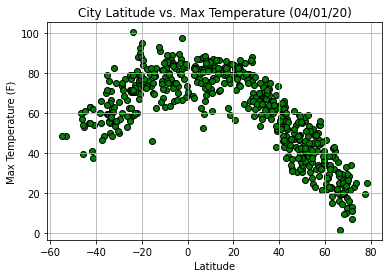

In [13]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Temp.png")
plt.show()

In [14]:
# OBSERVATION: Here... we see a scatter plot that is comparing Max Temperature and Latitude of our city data
# We can see that the relationshp in the scatter plot is curvelinear.. 
# This essentialyl showcases that it is neither positive nor negative but changes as latitude and max temp..
# Increase and decrease

## Latitude vs. Humidity Plot

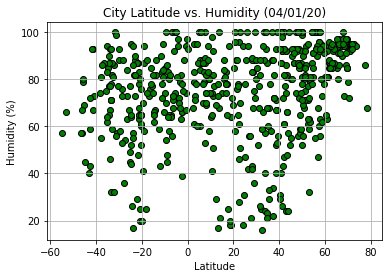

In [15]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Humid.png")
plt.show()

In [16]:
# OBSERVATION: the scatter plot is relatively random, however if we were to choose a direction...
# It seems that there is a weak positive correlation between Humidity and Latitude

## Latitude vs. Cloudiness Plot

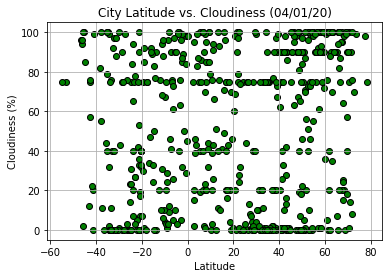

In [17]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Cloud.png")
plt.show()

In [18]:
# OBSERVATION: when comparing cloudiness and latitude, the scatter plot is quite random.
# However, there do seem to be a lot of points on the extreme values of Cloudiness (0 or 100%)

## Latitude vs. Wind Speed Plot

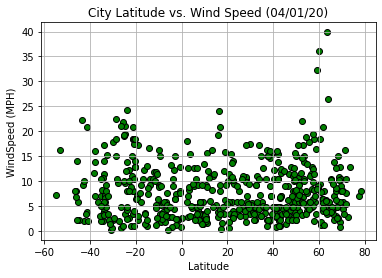

In [19]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed (MPH)")
plt.grid (True)
plt.savefig("../Images/Lat_v_Wind.png")
plt.show()

In [20]:
# OBSERVATION: When comparing Latitude and WindSpeed, there doesn't seem to be a correlation...
# neither positive nor negative..
# in terms of interesting trends.. regardless of latitude, most of the wind speeds seem to..
# hover around anywhere between 0 to 10 mph.

## Linear Regression

In [81]:
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)

In [82]:
northern = clean_city_data.loc[clean_city_data["Lat"] >= 0.0]
northern.reset_index(inplace=True)

southern = clean_city_data.loc[clean_city_data["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8964617015352833


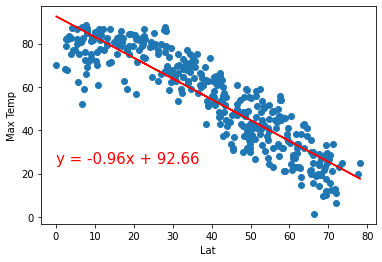

In [83]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,6)
plt.savefig("../Images/north_temp.png")
plt.show()

In [62]:
# OBSERVATION: We are comparing the Max Temp vs Latitude within the Northern Hemisphere here...

# There is a strong "negative" correlation/association between the variables

# our equation puts the y value (max-temp) as our dependent variable

# whereas the x-value(latitude) is our independent variable

# with that being said we can use said equation to predict Max temp values for latitudes not included here..

# specifically within the northern hemisphere here..

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6787506497680215


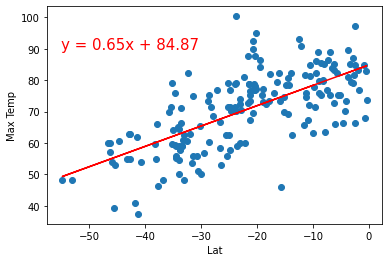

In [84]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)
plt.savefig("../Images/south_temp.png")
plt.show()

In [65]:
# OBSERVATION: We are comparing the Max Temp vs Latitude within the Southern Hemisphere here...

# There is a strong "positive" correlation/association between the variables

# our equation puts the y value (max-temp) as our dependent variable

# whereas the x-value(Latitude) is our independent variable

# with that being said we can use said equation to predict Max temp values for latitudes not included here..

# specifically within the southern hemisphere here...

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.26208671043559445


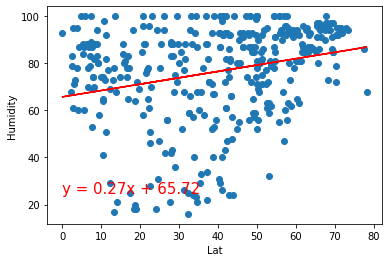

In [85]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig("../Images/north_humid.png")
plt.show()

In [67]:
# OBSERVATION: We are comparing the Humidity vs Latitude within the Northern Hemisphere here...

# There is a weak/moderate positive correlation/association between the variables
# The scatterplot is not as clustered as the ones seen before..(temp vs. lat)

# our equation puts the y value (Humidity) as our dependent variable

# whereas the x-value(latitude) is our independent variable

# with that being said we can use said equation to predict Humidity values for latitudes not included here..

# specifically within the northern hemisphere here..

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11358830495954857


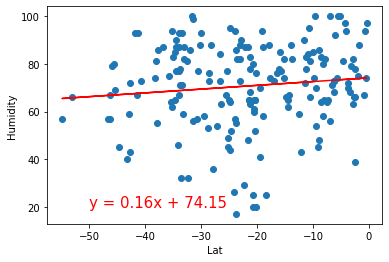

In [86]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (-50,20)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,8)
plt.savefig("../Images/south_humid.png")
plt.show()

In [69]:
# OBSERVATION: We are comparing the Humidity vs Latitude within the Southern Hemisphere here...

# There is a weak/moderate positive correlation/association between the variables
# The scatterplot is not as clustered as the ones seen before..(temp vs. lat)

# our equation puts the y value (Humidity) as our dependent variable

# whereas the x-value(latitude) is our independent variable

# with that being said we can use said equation to predict Humidity values for latitudes not included here..

# specifically within the southern hemisphere here..

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17752009533381458


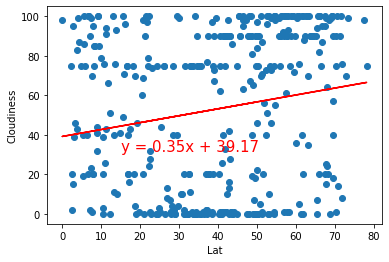

In [87]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (15,32)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,9)
plt.savefig("../Images/north_cloud.png")
plt.show()

In [71]:
# OBSERVATION: We are comparing the Cloudiness vs Latitude within the Northern Hemisphere here...

# There is a weak positive correlation/association between the variables
# The scatterplot is quite sparsed out 

# our equation puts the y value (Cloudiness) as our dependent variable

# whereas the x-value(latitude) is our independent variable

# with that being said we can use said equation to predict Cloudiness values for latitudes not included here..

# specifically within the northern hemisphere here..

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.057112593003276924


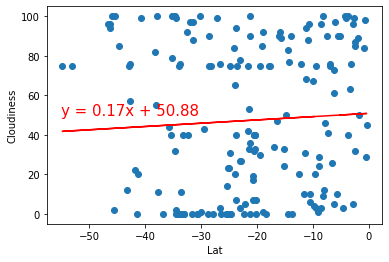

In [88]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (-55,50)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,10)
plt.savefig("../Images/south_cloud.png")
plt.show()

In [73]:
# OBSERVATION: We are comparing the Cloudiness vs Latitude within the Southern Hemisphere here...

# There is a very weak/almost no positive correlation/association between the variables
# The scatterplot is quite sparsed out 

# our equation puts the y value (Cloudiness) as our dependent variable

# whereas the x-value(latitude) is our independent variable

# with that being said we can use said equation to predict Cloudiness values for latitudes not included here..

# specifically within the Southern hemisphere here..

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10696594956267969


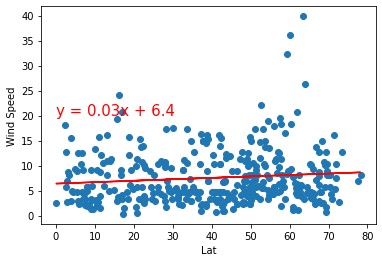

In [89]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,20)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,11)
plt.savefig("../Images/north_wind.png")
plt.show()

In [75]:
# OBSERVATION: We are comparing the Wind Speed vs Latitude within the Northern Hemisphere here...

# There is a very weak/almost no positive correlation/association between the variables
# The scatterplot is quite sparsed out and does not show a directional correlation like before
# furthermore, the line of best fit is nearly horizontal indicating almost no directional correlation..

# our equation puts the y value (Wind Speed) as our dependent variable

# whereas the x-value(latitude) is our independent variable

# with that being said we can use said equation to predict Wind Speed values for latitudes not included here..

# specifically within the northern hemisphere here..

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.13320325330460206


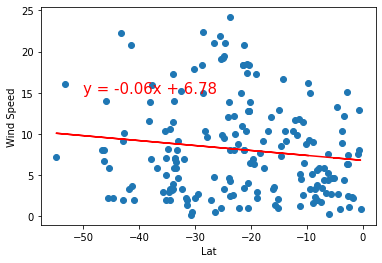

In [90]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (-50,15)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,12)
plt.savefig("../Images/south_wind.png")
plt.show()

In [77]:
# OBSERVATION: We are comparing the Wind Speed vs Latitude within the Southern Hemisphere here...

# There is a weak negative correlation/association between the variables

# our equation puts the y value (Wind Speed) as our dependent variable

# whereas the x-value(latitude) is our independent variable

# with that being said we can use said equation to predict Wind Speed values for latitudes not included here..

# specifically within the southern hemisphere here..